# 탐색적 분석 (exploratory data analysis: EDA)  
- 데이터 분석의 첫 번째 단계로  
- 본격적인 데이터 분석을 수행하기에 전에 데이터의 전체적인 특성을 살펴보는 것
- (수집한 데이터가 분석에 적절한지 알아보는 과정)
- 그래프와 통계적 분석 방법을 활용하여 데이터 탐구 수행  
---
- 데이터의 양, 유형과 범위, 유효성, 비율, 분포 등 파악
- (분석하기에 데이터양이 적절한지, 쓸모있는 데이터인지 확인)
---
- 데이터 전처리를 같이 수행하기도 함
  - 데이터 클리닝 - 결측치 및 잘못된 값 처리
  - 스케일링 - 표준 스케일링, min-max 스케일링
  - 결측치/이상치 처리 - 결측치/이상치 탐지 및 제거/대체
  - 데이터 변환 - 로그 변환, 카테고리 인코딩 등


## 주택가격 데이터 탐색
- 사용 데이터 : 미국 아이오와 주의 에임즈(Ames) 지방의 주택 가격 정보 데이터
- 79개의 변수로 구성 

### 주택가격 데이터 탐색 수행 작업

- 데이터 특성 파악 : 기본 정보 확인
  - df.info() : 컬럼 확인
  - features(컬럼) 설명 자료 활용
  - 박스 플롯으로 기초 통계 분포 확인 
  - 히스토그램으로 발생 빈도수 확인
  - distplot() 으로 분포 확인 (왜도/첨도 확인)
    - 정규분포에서 많이 벗어나 있으면 로그변환 수행 필요

- 목적변수(타겟 변수)와 다른 입력 변수(피처)들 과의 관계 확인
  - 히트맵으로 상관관계 파악
  - pairplot()으로 확인
  - 산포도로 확인 : 관계 및 이상치 파악

- 카테고리 특성과의 관계 확인
  - 박스플롯  확인
    -- 예) 평점에 따른 가격 차이  
           연도별 주택가격 변화 추이 확인

- 결측치 확인
- 이상치 확인
  - 확률 분포에서 찾기 : distplot()
  - 산포도로 찾기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns
from scipy.stats import norm #science python 의 통계 패키지의 정규분포와 비슷한지 확인
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [5]:
# 주택가격 데이터 
data = pd.read_csv("../data/house_price.csv")
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## 데이터 특성 파악
- 특성 설명 : features(컬럼) 설명 자료 필요함 (도메인지식이 분석에 아주 중요함)
---
- SalePrice: 판매가격(달러), 목적변수
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [6]:
# 복사본 사용 
df = data.copy()

In [7]:
# 모양 : 행, 열 수 확인
df.shape

(1460, 81)

In [8]:
# 기본 정보 확인
df.info()
# 컬럼(피처) 확인
# 빈 값 꽤 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 목적 변수 (타겟 값) 
- 주택 가격이므로 SalePrice가 목적변수 임
- 주택 가격 예측 

In [10]:
# 기초 통계값 확인 
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21aae0dcc10>,
 'caps': [<matplotlib.lines.Line2D at 0x21aa928c590>,
 'boxes': [<matplotlib.lines.Line2D at 0x21aacbd42d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21aae0dfbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21aadf16290>],
 'means': []}

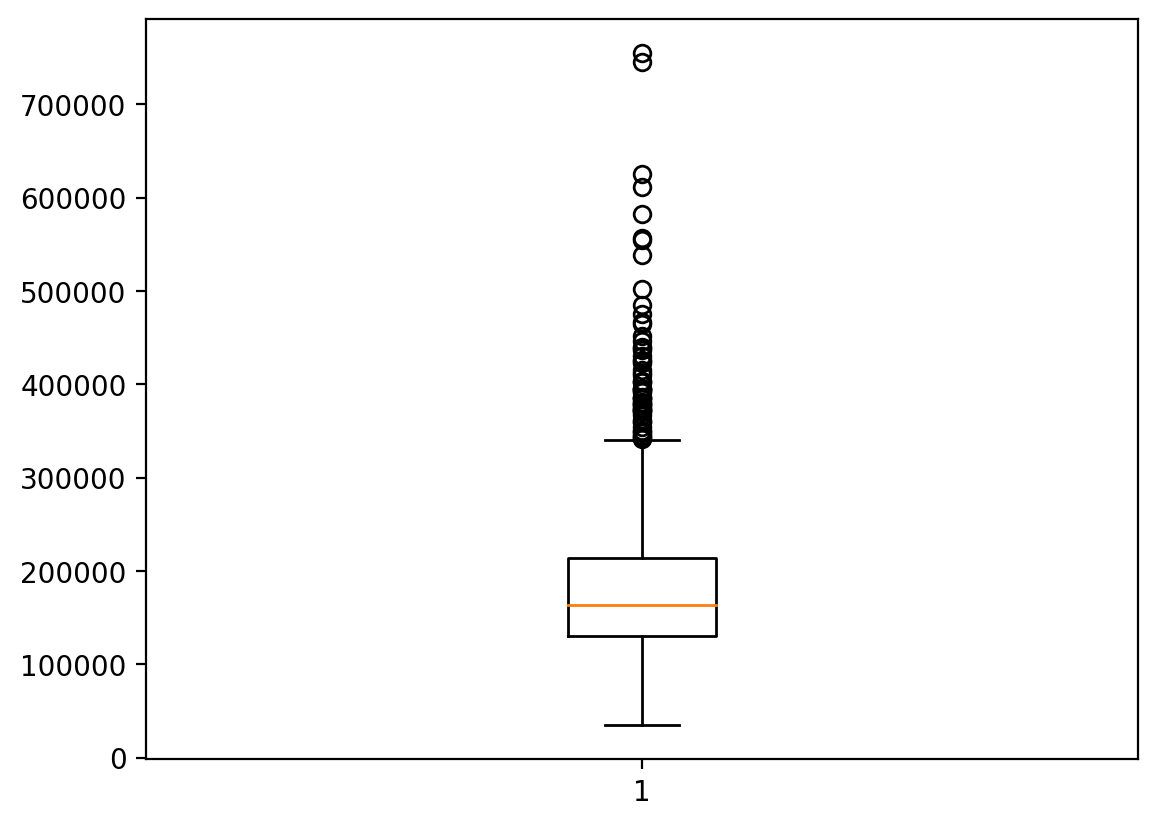

In [11]:
# 박스 플롯으로 기초 통계 분포 확인
plt.boxplot(df['SalePrice'])
# 이상치 확인 : 많이 벗어난 값들이 상당히 존재

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <BarContainer object of 30 artists>)

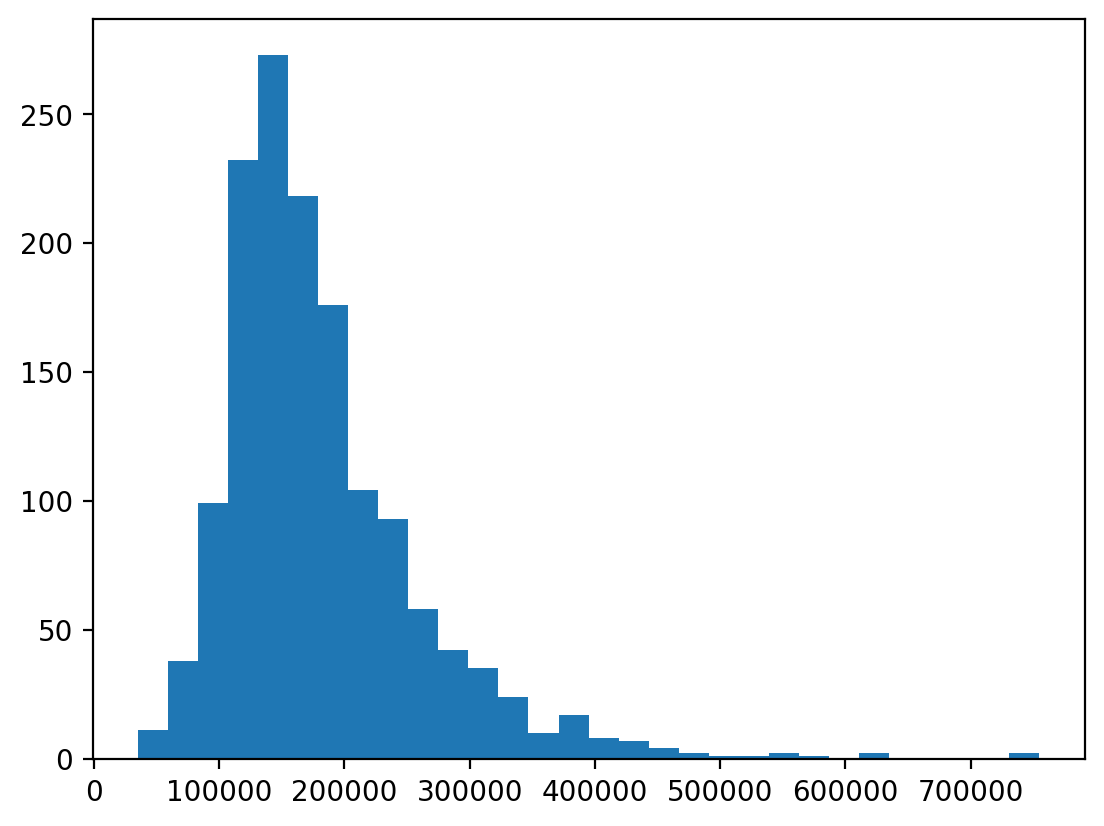

In [12]:
# 히스토그램 : 빈도수 확인
plt.hist(df['SalePrice'], bins=30)
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

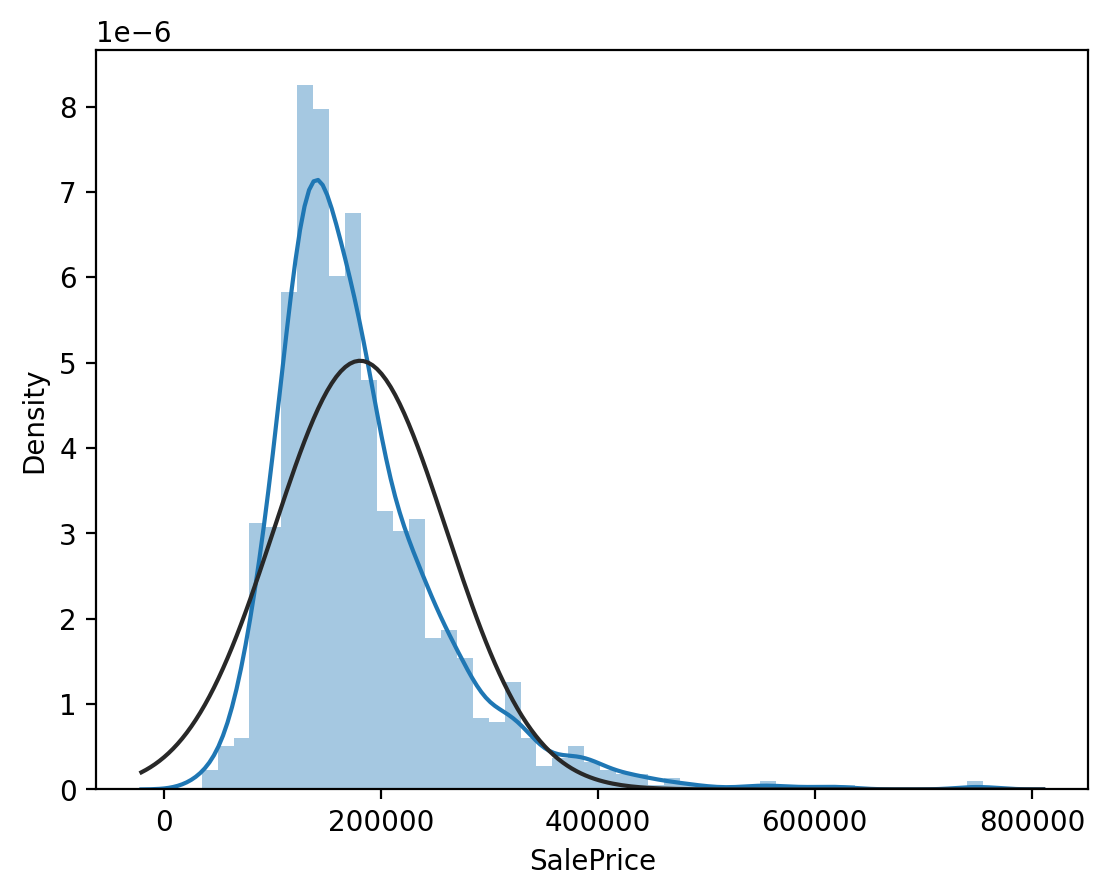

In [14]:
# 확률 분포 확인
# 가장 가까운 정규 분포와 비교 
sns.distplot(df['SalePrice'], fit=stats.norm)
# 왼쪽으로 치우쳐 있음

## 정규분포와 유사한지 확인  
- 데이터가 정규분포를 따르면 평균값, 분산 등을 예측하기 수월하기 때문에
- 정규분포에서 얼마나 벗어났는지 확인 
- skewness (왜도: 대칭성) 
- kurtosis (첨도: 끝부분의 모양)
- 왜도와 첨도 값들이 0에 가까울수록 정규분포와 유사 

<Axes: ylabel='Density'>

왜도 :  0.0036823182809105318
첨도 :  -0.11300453131042731


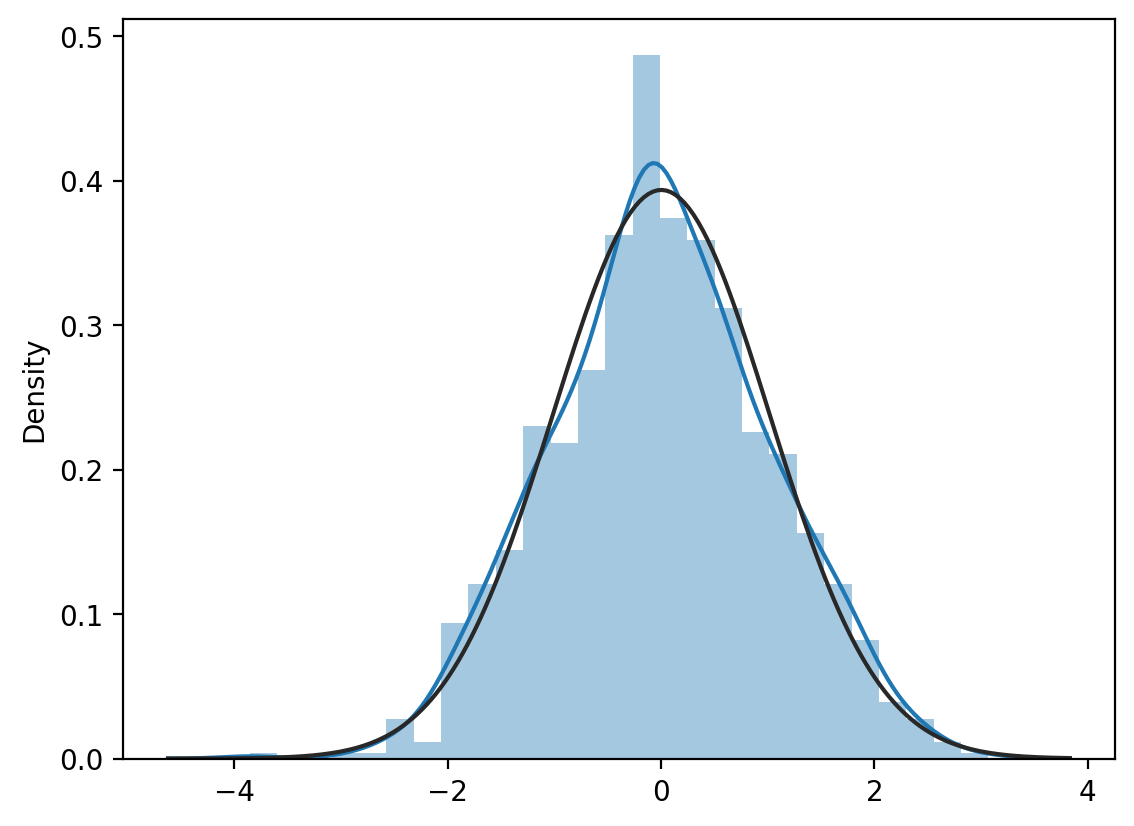

In [18]:
# 실제 정규분포인 경우의 왜도와 첨도 확인
x = np.random.randn(1000)
sns.distplot(x, fit=stats.norm)

print('왜도 : ', stats.skew(x))
print('첨도 : ', stats.kurtosis(x))

<Axes: xlabel='SalePrice', ylabel='Density'>

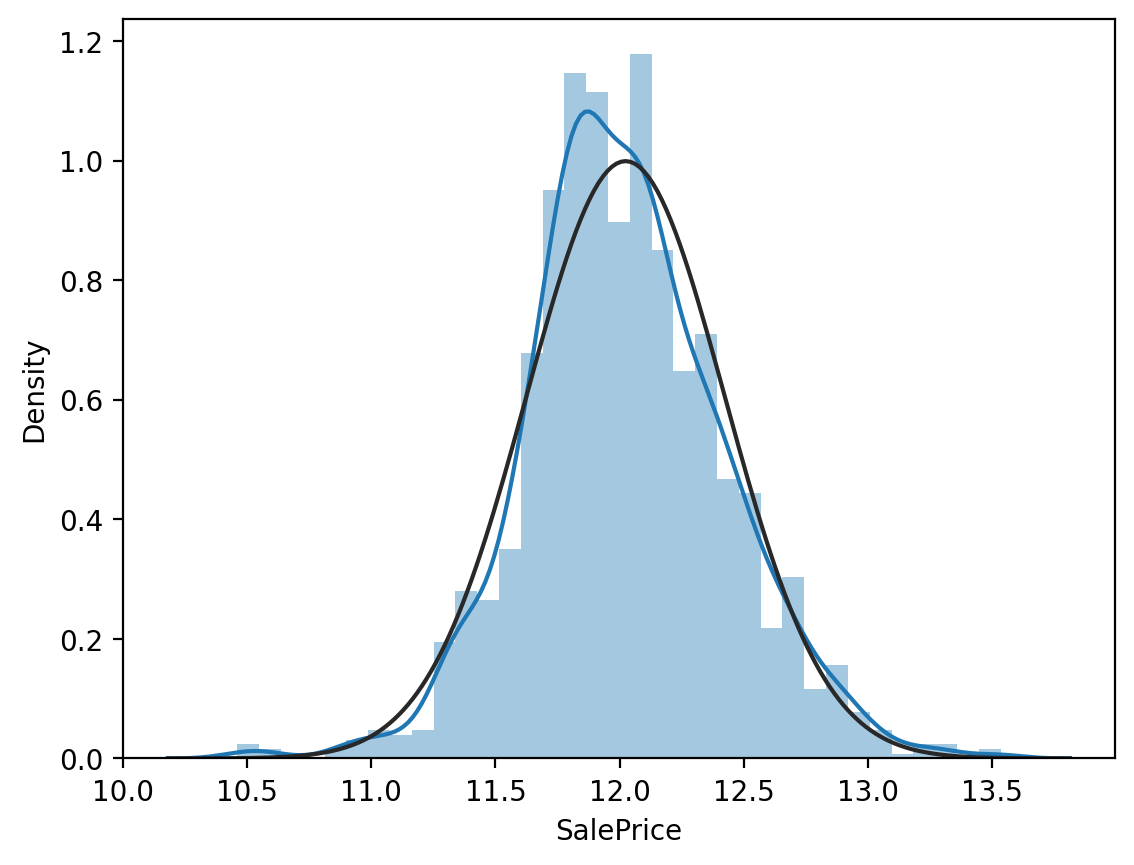

In [19]:
# 주택 가격은 왼쪽으로 치우져 있는 것 확인
# 정규분포와 유사하게 변환 -> 로그 변환 수행
# 일반적으로 정규분포에서 벗어나 있는 경우 로그 변환 수행 

# 주택 가격에 로그변환 수행 
sns.distplot(np.log(df['SalePrice']), fit=stats.norm)

In [23]:
# 주택 가격의 왜도/첨도 확인 
# 로그변환 전
print('왜도 : ', df['SalePrice'].skew())
print('첨도 : ', df['SalePrice'].kurtosis())

# 로그변환 후
print('왜도 : ', np.log(df['SalePrice']).skew())
print('첨도 : ', np.log(df['SalePrice']).kurtosis())

왜도 :  1.8828757597682129
첨도 :  6.536281860064529
왜도 :  0.12133506220520406
첨도 :  0.8095319958036296


## 목적변수(타겟 변수)와 다른 입력 변수(피처)들 과의 관계 확인  
- 상관관계 확인 (상관계수 : 코럴레이션코엡스)

- 데이터 분석은 입력 변수를 사용하여 목적 변수를 예측하는 작업  
- 각 입력 변수와 목적 변수 사이의 상관계수를 보면 데이터의 연관성을 파악하는데 도움이 됨  
- 절대적이진 않음  
    - 예: 중고차 가격(타겟 변수) : 연식(입력 변수)이 오래되면 가격이 떨어짐
---
- 입력 변수(input)의 다른 이름
  - 특성 (features)
  - 설명 변수 (explanatory variable)
  - 독립 변수 (independent variable)
- 목적 변수(target variable) 의 다른 이름
  - 레이블 (label)
  - 출력 변수 (output)
  - 종속 변수 (dependent variable)

### 히트맵으로 상관관계 파악 

In [26]:
# 주의! - 열의 데이터 타입이 문자(object)인 열들은 제거
object_cols = df.select_dtypes(include=['object']).columns
new_df = df.drop(columns=object_cols)
# new_df

In [27]:
# 상관관계 매트릭스 출력 
new_df_corr_mat = new_df.corr()
new_df_corr_mat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


<Figure size 1200x900 with 0 Axes>

<Axes: >

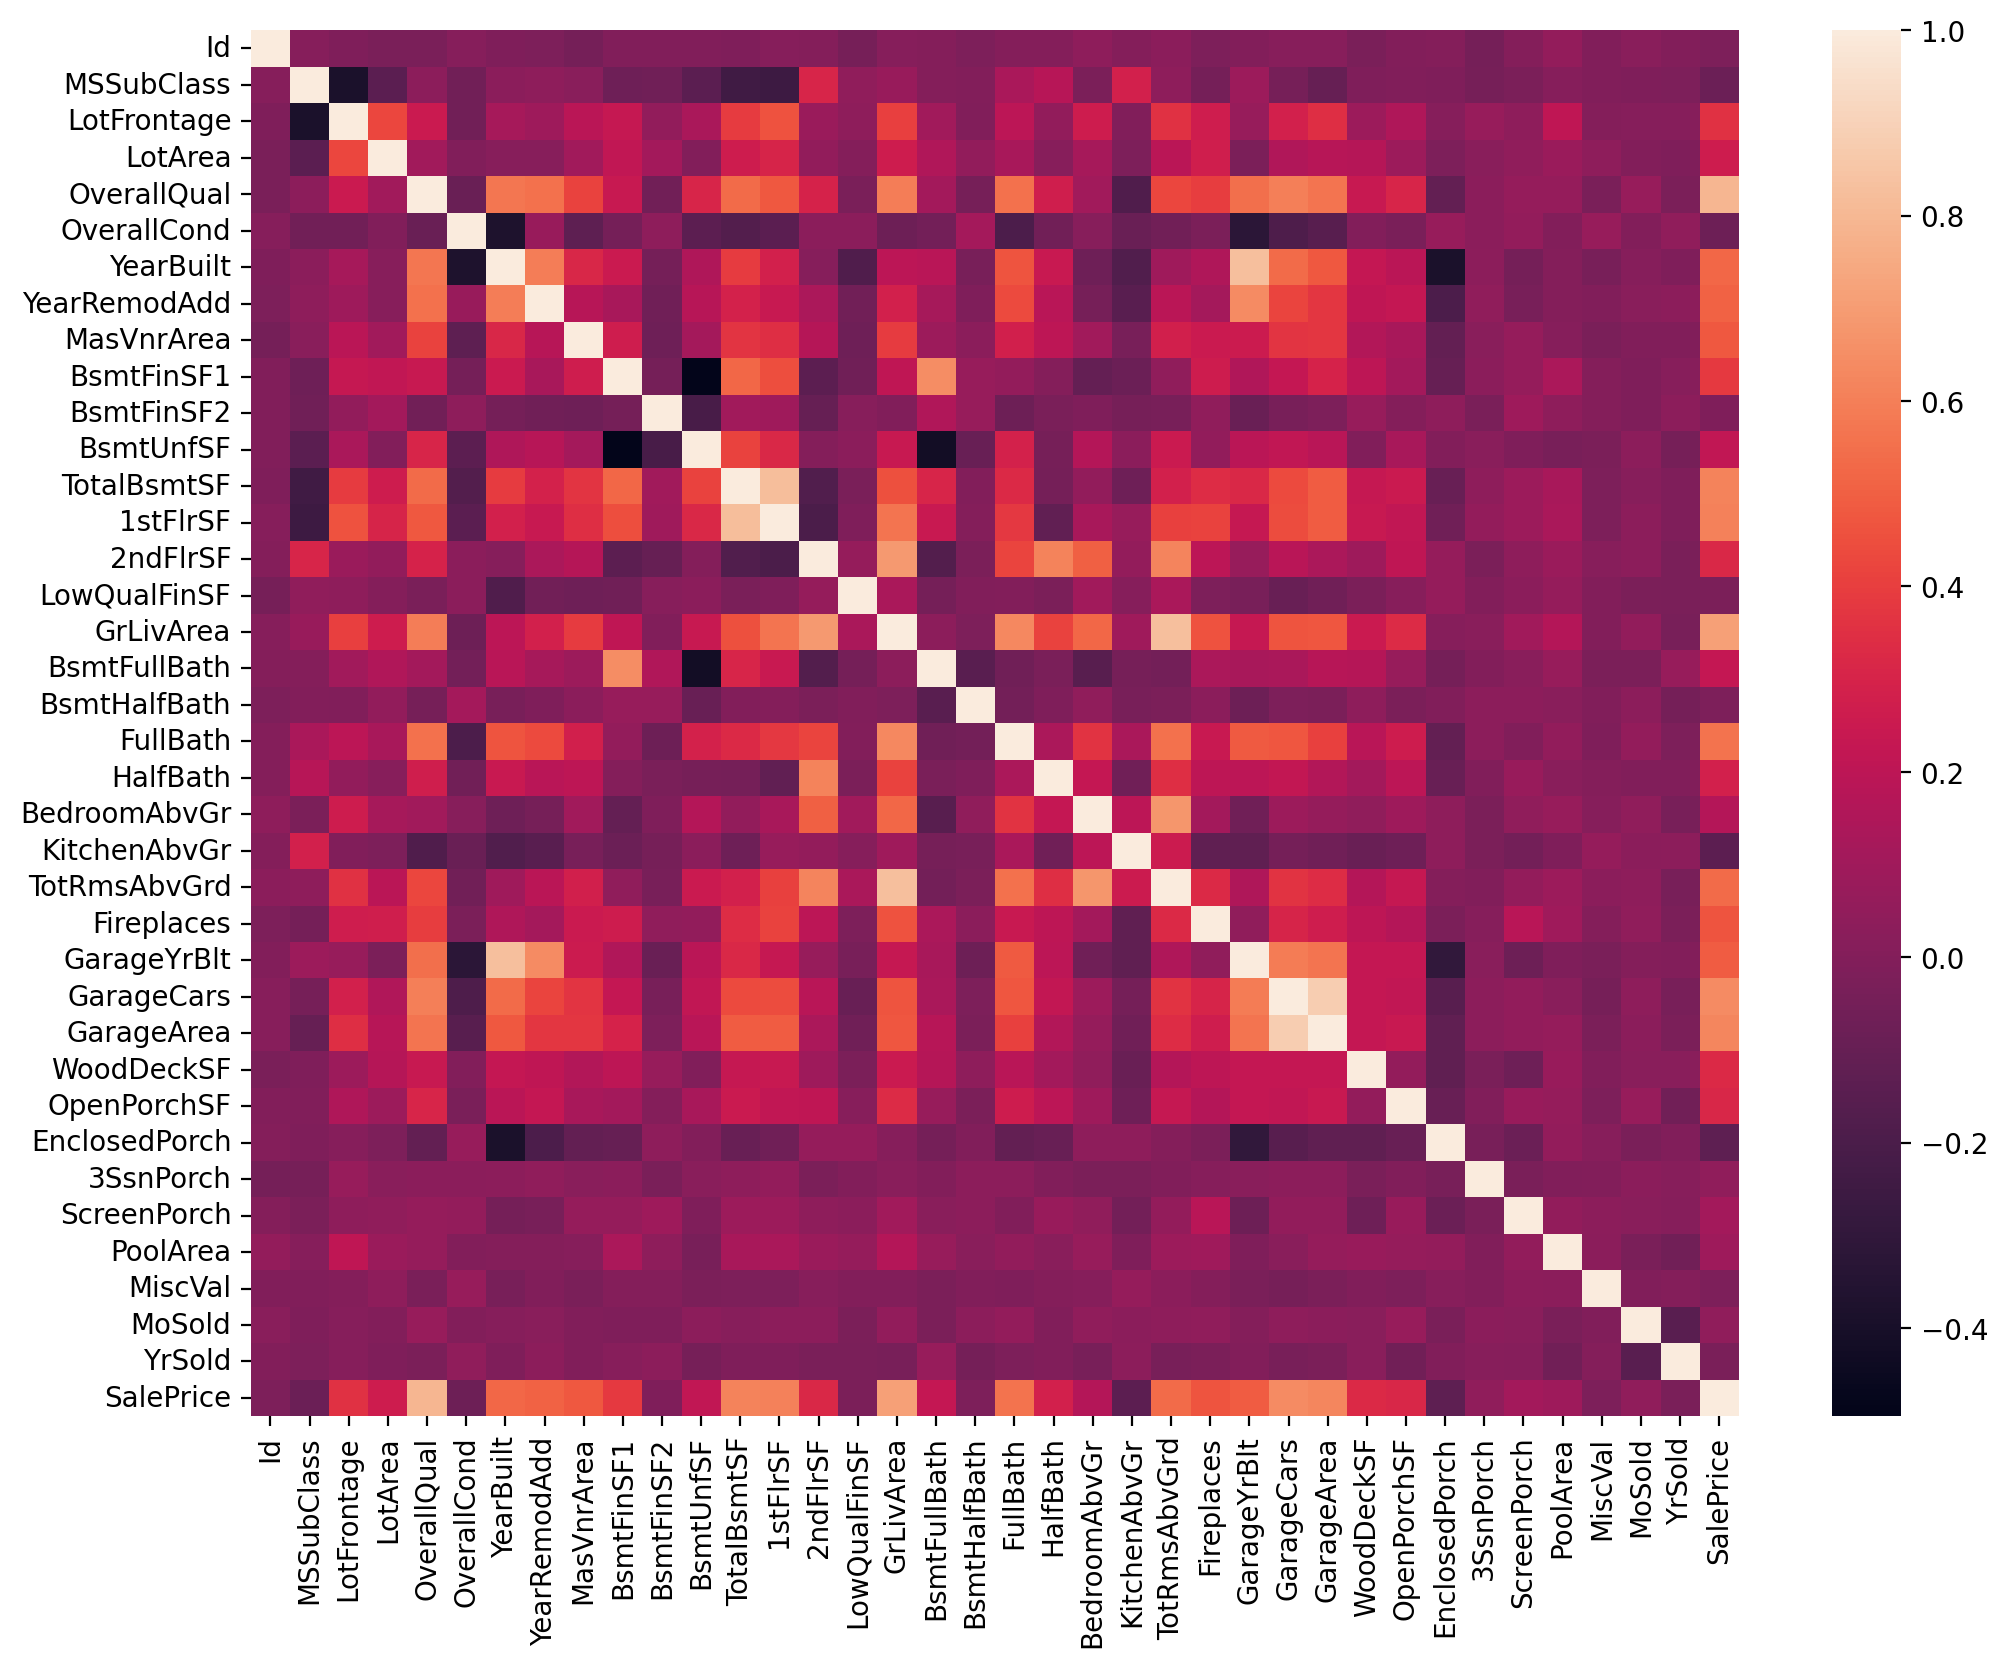

In [29]:
# 상관관계 매트릭스를 heatmap으로 표시 
plt.figure(figsize=(12,9))
sns.heatmap(new_df_corr_mat)
plt.show()

In [30]:
new_df_corr_mat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [31]:
# SalePrice가 맨 아래 행에 있으므로 
# 아래 5행만 확인
# 판매가격과 OverallQual의 계수가 높게 나왔음
# YearBuilt 건축연도도 중요하게 보임 
new_df_corr_mat.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolArea,0.057044,0.008283,0.206167,0.077672,0.065166,-0.001985,0.004950,0.005829,0.011723,0.140491,...,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.006242,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021172,-0.013585,0.011200,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,-0.015727,...,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.000712,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [32]:
new_df_corr_mat.shape

(38, 38)

In [34]:
# SalePrice와 상관관계가 높은 변수와 값 추출  
# top10
new_df_corr_mat.loc['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(10)


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [36]:
# bottom10
new_df_corr_mat.loc['SalePrice'].sort_values(ascending=True).head(10)
# 상관계수 : 음수
# - 주택 가결을 떨어트리는 요인이라 판다
# 음수라고 해서 상관이 없는 것은 아님 : 방향이 반대일 뿐
# 절대치로 보면 됨
# 그렇지만 음수  최대치가 -0.135로 적은 수치이기 때문에 큰 영향은 없다고 보면 됨
# 무시해도 될 수치


# 상관계수는 절대값을 기준으로 확인

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64

In [46]:
df_sort = new_df_corr_mat['SalePrice'].sort_values(ascending=False)
top10_df = df_sort[:10]
top10_df

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

<Axes: >

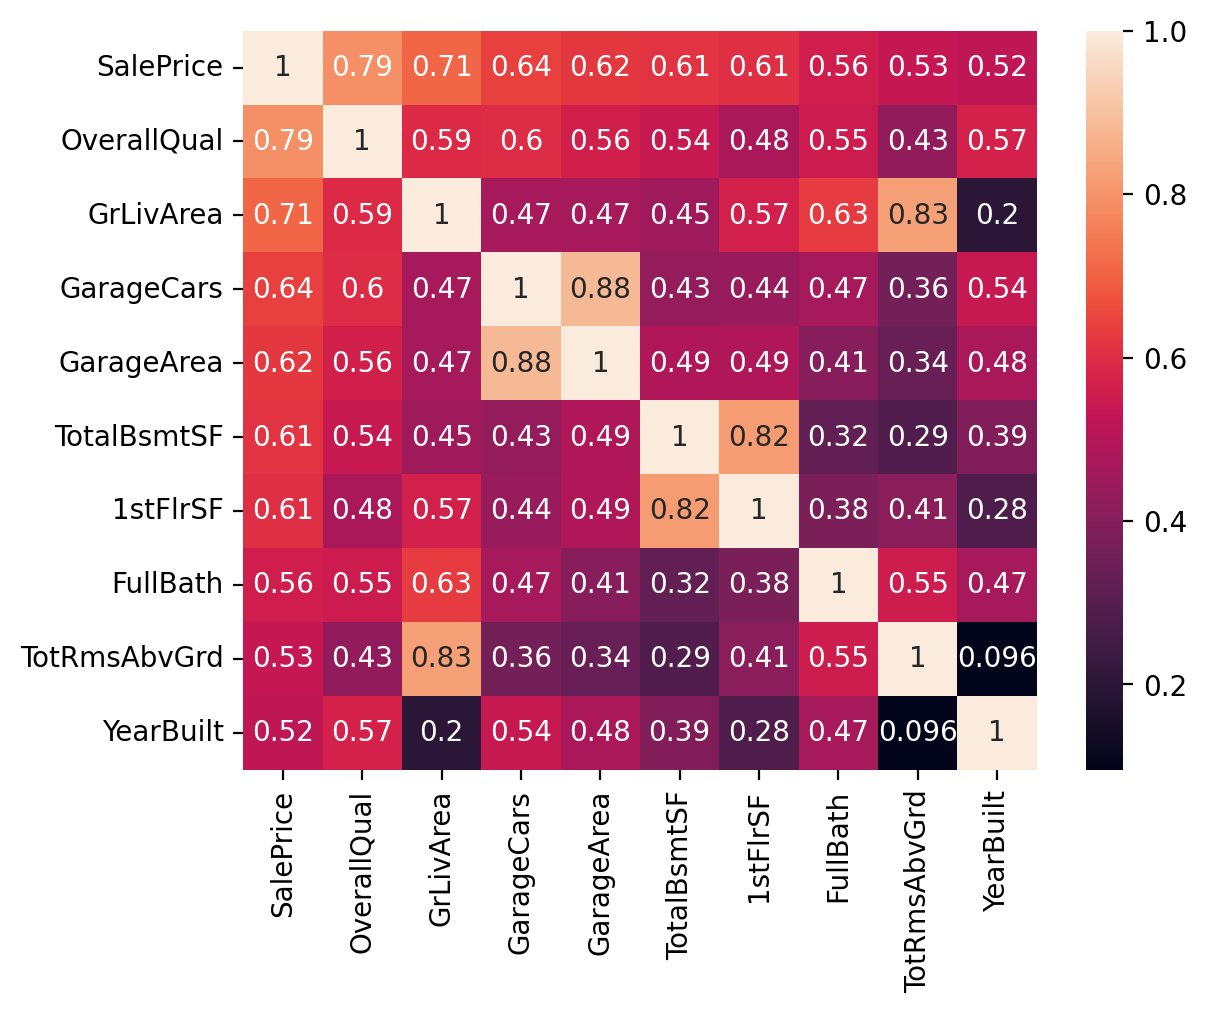

In [48]:
cormat_10 = df[top10_df.index].corr()
sns.heatmap(cormat_10, annot=True)

In [ ]:
# GarageCars와 GarageArea 특성은 상관계수가 크므로 의미가 있는 특성으로 보임
# 2개가 유사한 특성이므로 하나는 생략 가능 
# TotalBsmtSF와 1stFlrSF, 
# TotRmsAbvGrd와 GrLivArea 생략 
# 3개 생략하고 7개로 pairplot() 작성

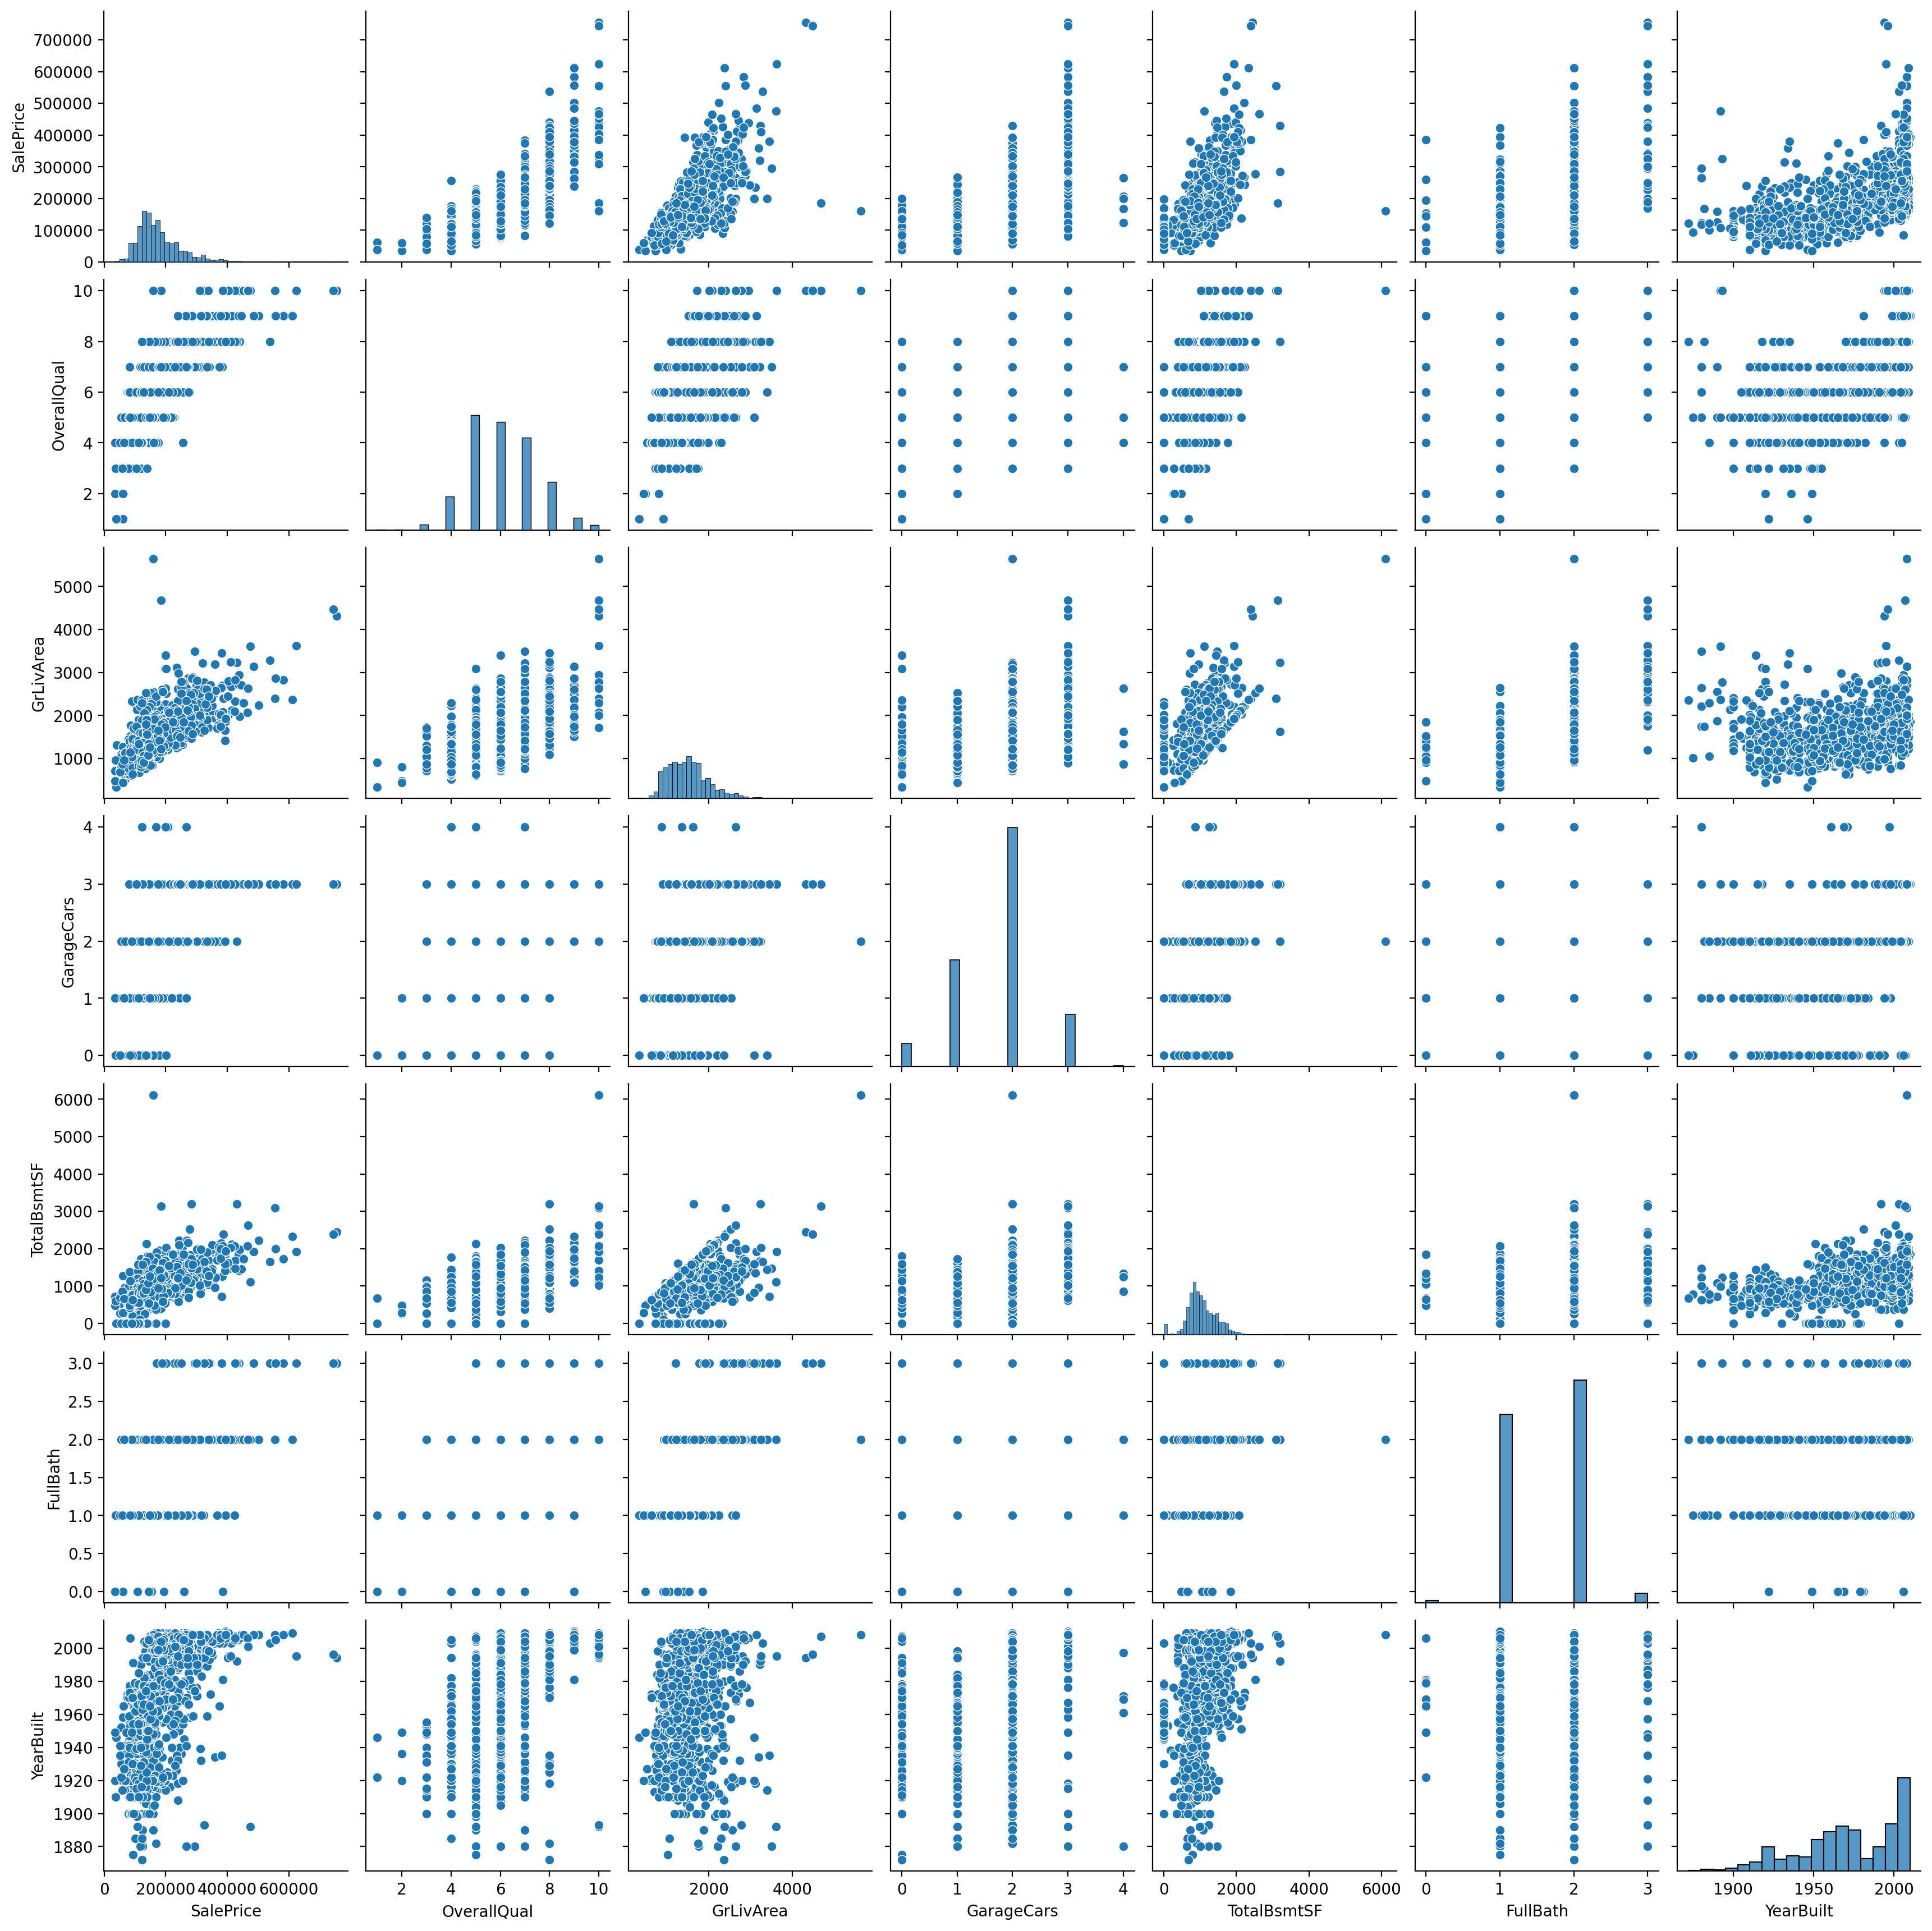

In [56]:
# pairplot() 사용해서 상관관계 확인
# top10_df.index

# sns.pairplot(df[top10_df.index])
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])
plt.show()

# 대각선 위와 아래는 축만 바꾼 것으로 한쪽만 확인하면 됨
# 선형적인 관계로 보이는 그래프 찾아서 확인
# - 한쪽이 증가하면 다른 쪽도 증가/감소 (영향을 미침: 관계가 있음)
# - 맨 위 세번째와 다섯번째가 특별히 선형적으로 보임
# - 두 번째도 우상향하는 경향으로 관계는 있어 보임 

### 산포도 확인
- 두 변수 사이의 관계 파악

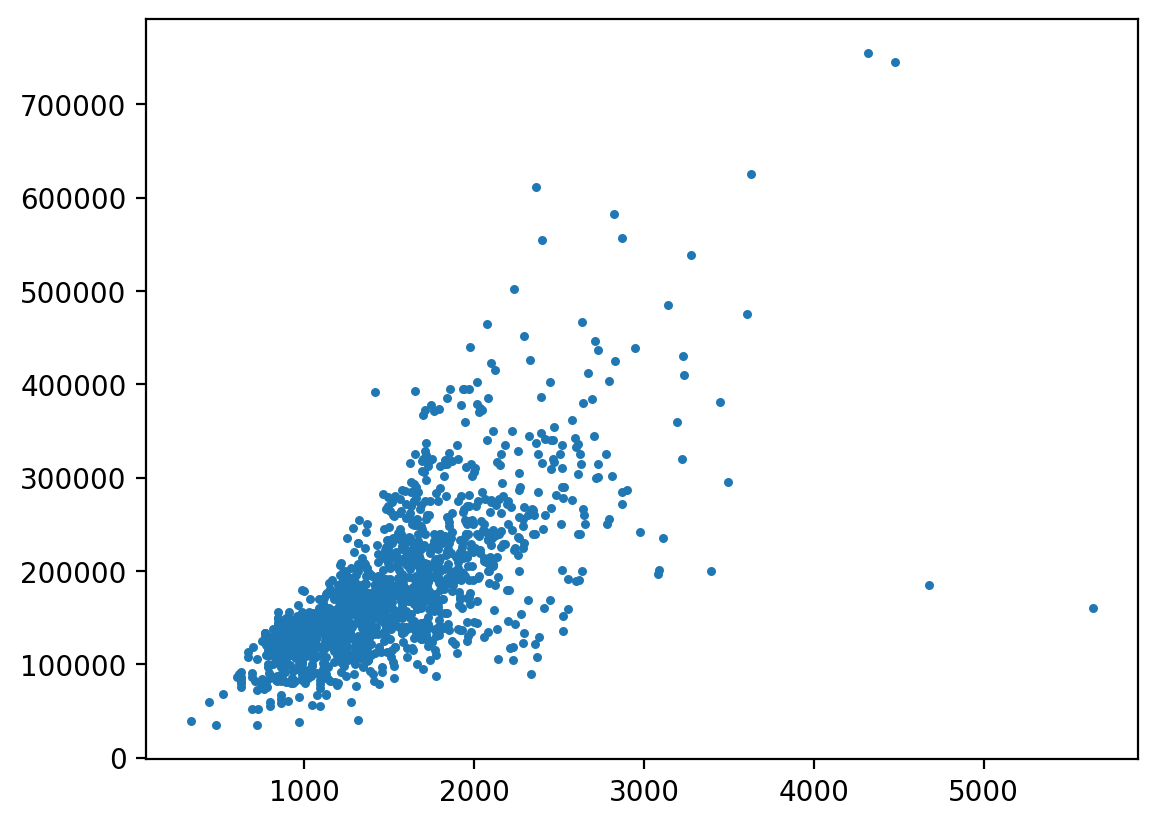

In [57]:
plt.scatter(df['GrLivArea'], df['SalePrice'], s=5)
plt.show()
# 오른쪽 하단의 두 집은 면적에 비해 가격이 많이 싼 집 - 이상치 

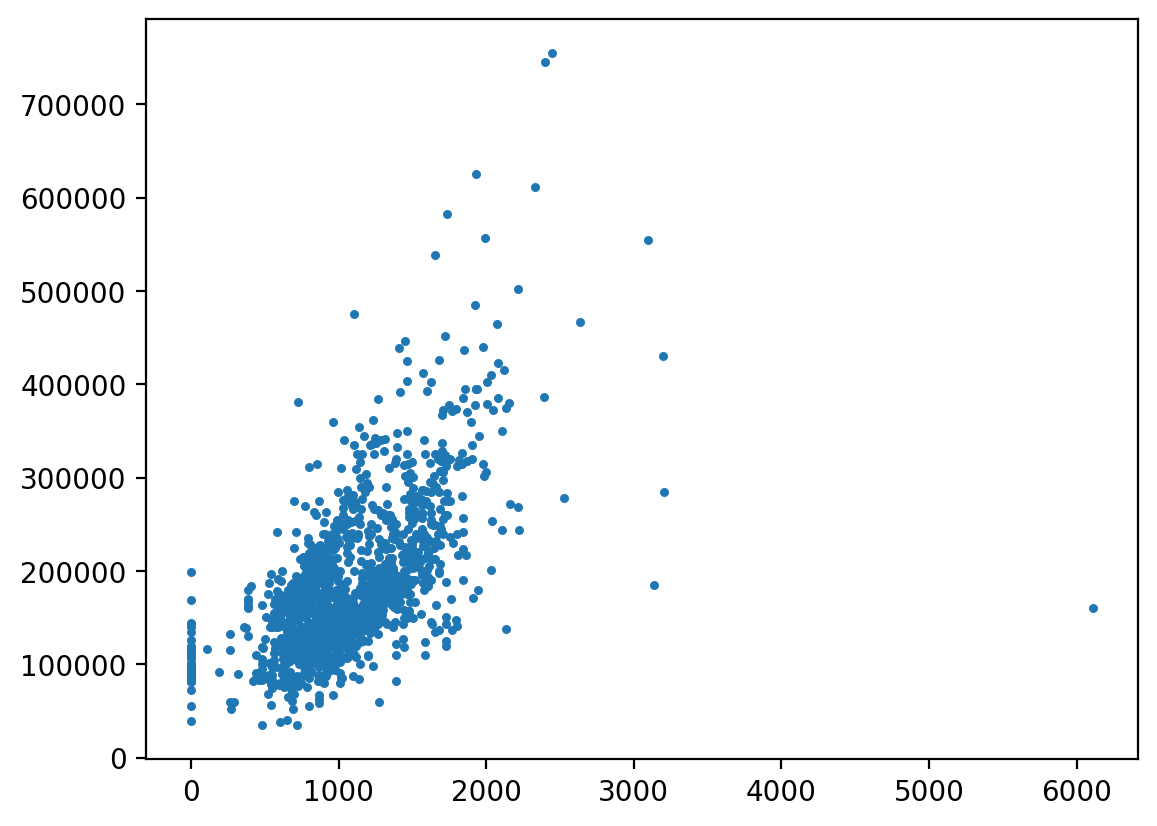

In [58]:
plt.scatter(df['TotalBsmtSF'], df['SalePrice'], s=5)
plt.show()
# 오른쪽 하단 이상치 - 지하실 면적이 많이 넓은데 가격은 상대적으로 많이 저렴 

### 카테고리 특성과의 관계 확인 
- sns 박스플롯으로 보기

In [ ]:
# 범주형 변수인 OverallQual 확인

In [59]:
df['OverallQual'] # 범주형 변수
# 각 주택의 전반적인 평가 
# 1~10 평점 

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

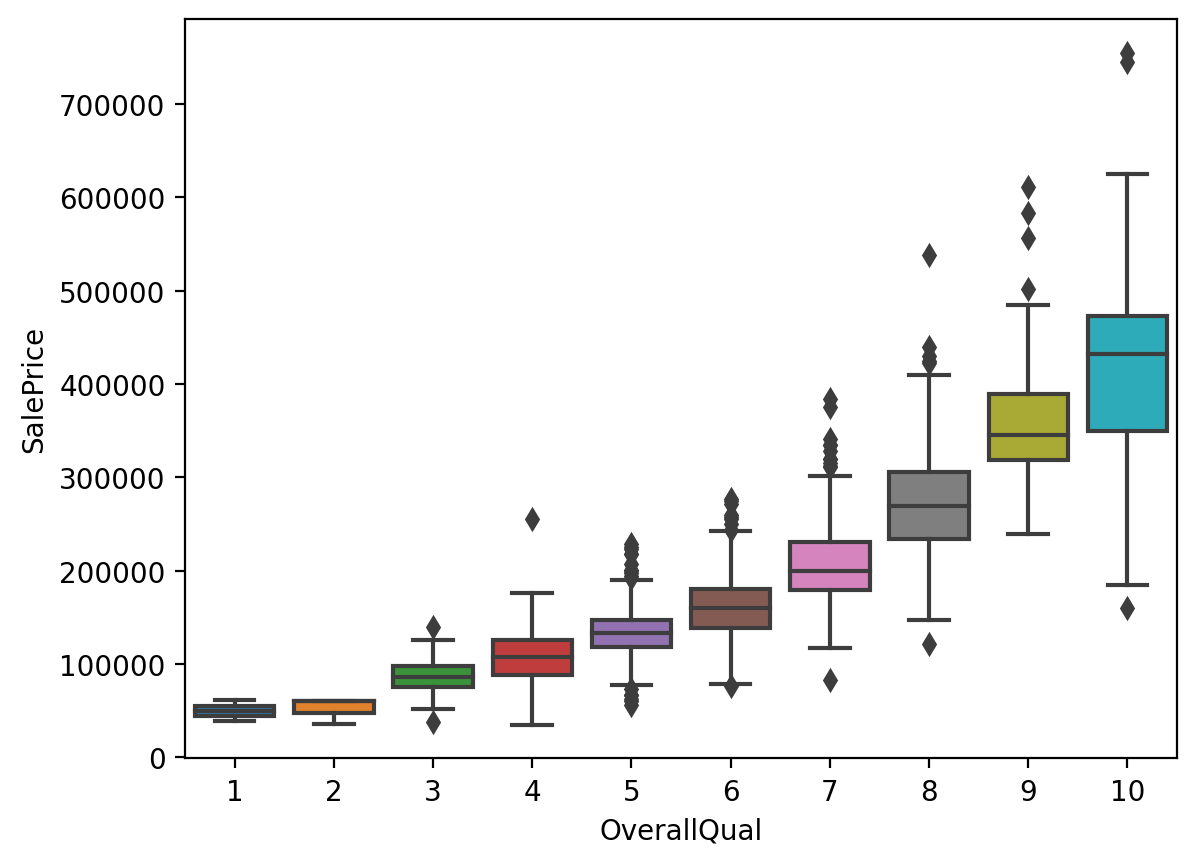

In [60]:
# boxplot으로 범주형 변수인 OverallQual 확인
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
# 가격이 높을수록 평점이 높음
# 평점이 높을수록 가격이 높음 

<Figure size 2000x800 with 0 Axes>

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

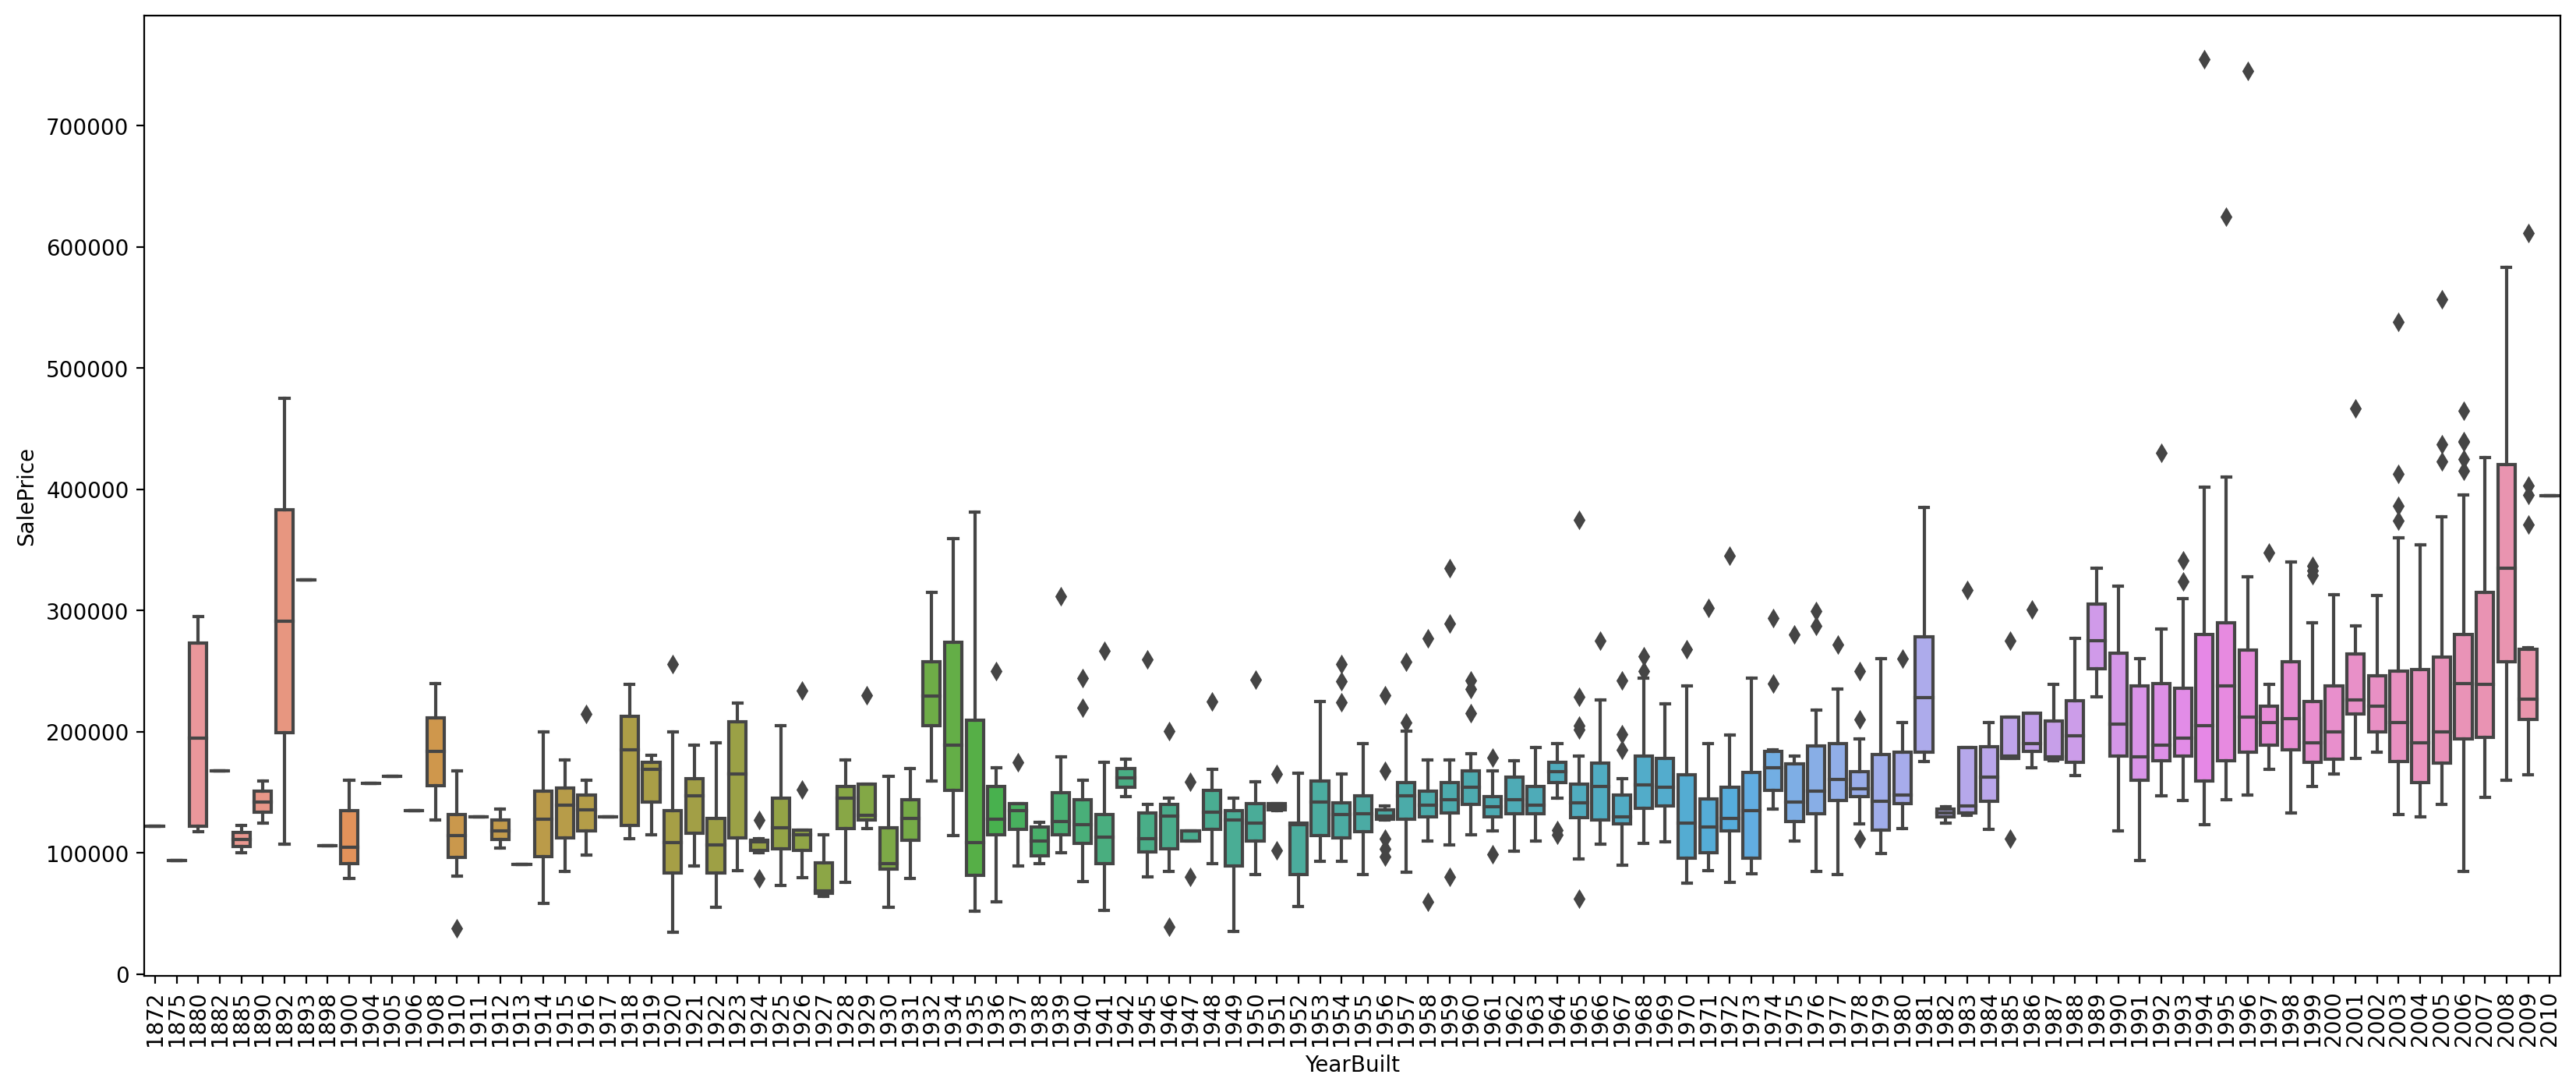

In [63]:
# 범주형 변수인 YearBuilt의 영향 확인
plt.figure(figsize=(20, 8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.show()
# 연도별로 확인했을 때 전반적으로 오름세는 보이지만 많이 오르지는 않았음

In [61]:
df['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

## 결측치 확인   

In [ ]:
# 결측치 확인만하고 
# 데이터 전처리할 때 결측치 처리

In [65]:
# Null 값 및 피처 확인 : top10 출력 
# to_frame() : 데이터프레임으로 변환
# null 값이 많은 순으로 내림차순 정렬
nulls_df = df.isnull().sum().sort_values(ascending=False).to_frame()
# nulls_df
nulls_df.columns = ['nulls_num']
nulls_df[:10]

,nulls_num
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [66]:
df.isnull().sum().values

array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  872,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,    0], dtype=int64)

In [69]:
df.shape
df.shape[0]
len(df)

(1460, 81)

1460

1460

In [71]:
# 각 특성마다 결측치가 발생한 비율 추가
nulls_df['percent'] = (nulls_df['nulls_num'] * 100 / df.shape[0]).round(2)
nulls_df[:20]

,nulls_num,percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55


In [ ]:
# 결측치를 확인했으면 결측치 처리 전략 세우기 
# 제거
# 대체
# 그냥 둔다 : 다음 단계에서 처리한다

# Electrical는 1개 값만 결측이므로 해당 샘플(행) 제거
# 주의! 결츠치를 제거하기 전에 데이터 중요도 점검 필요 
# 도메인 특성상 심도 있게 결정해야 함 (경험 필요)

In [ ]:
# 예 : 결정
# 결측치가 1개 있는 Electrical는 샘플(행) 삭제
# 결측치가 1개 초과한 경우의 모든 열을 제외 (삭제)

In [74]:
# 삭제할 컬럼 인덱스 확인
nulls_df[nulls_df['nulls_num'] > 1].index

# 제거하기 전 데이터프레임 컬럼 수 확인
df.shape

# 결측치가 2개 이상있는 컬럼 삭제 
df_del = df.drop(nulls_df[nulls_df['nulls_num'] > 1].index, axis=1)
df_del.shape

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea'],
      dtype='object')

(1460, 81)

(1460, 63)

In [76]:
#  결측치가 1개인 경우 행(샘플) 삭제
df_del = df_del.drop(df.loc[df['Electrical'].isnull()].index)
df_del.shape

(1459, 63)

In [80]:
# 최종 null 값 확인
df_del.isnull().sum().max()

0

In [ ]:
4:25에 시작합니다

## 이상치  확인

In [ ]:
# 표준 편차가 큰 샘플 찾거나
# 산포도에서 멀리 떨어진 값 탐색
# 또는 이상치 패턴 데이터를 이용하여 머신러닝 학습시켜서 찾기도 함

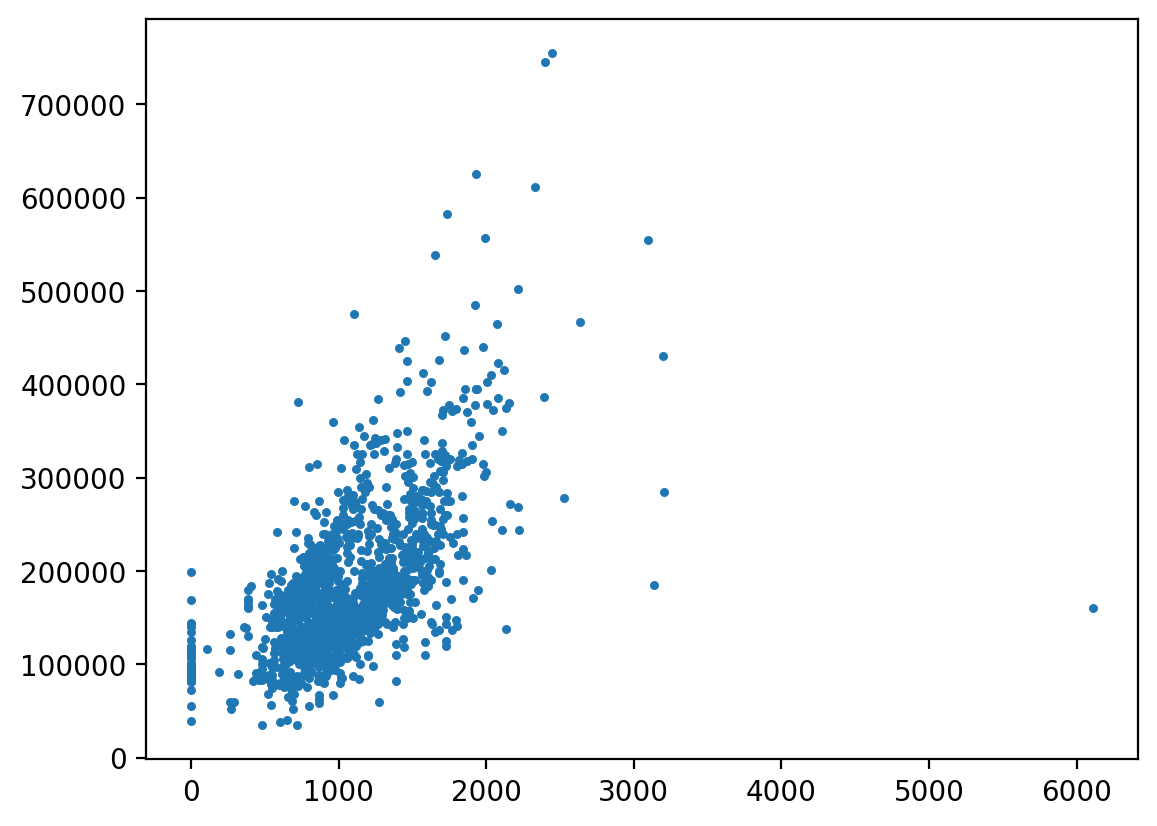

In [81]:
plt.scatter(df['TotalBsmtSF'], df['SalePrice'], s=5)
plt.show()
# 오른쪽 하단 이상치 - 지하실 면적이 많이 넓은데 가격은 상대적으로 많이 저렴 

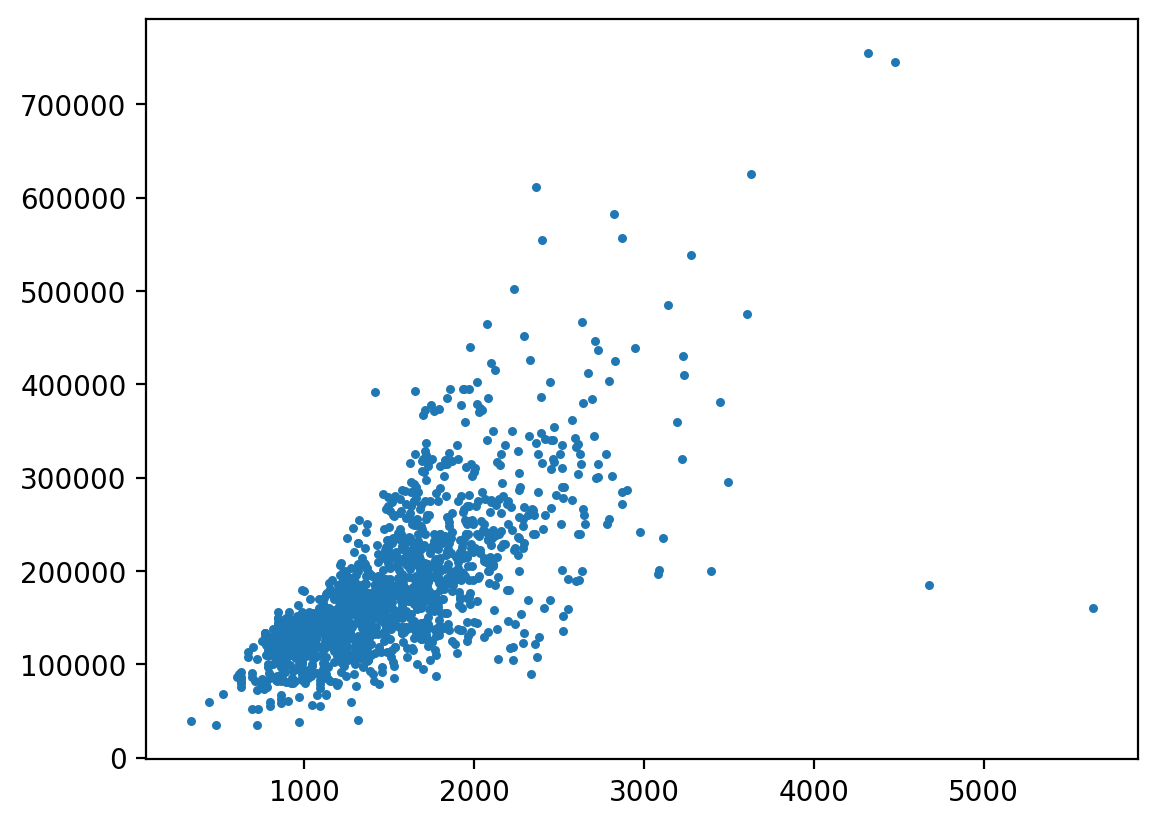

In [82]:
plt.scatter(df['GrLivArea'], df['SalePrice'], s=5)
plt.show()
# 오른쪽 하단의 두 집은 면적에 비해 가격이 많이 싼 집 - 이상치 